In [1]:
import re
import numpy as np
import pandas as pd
import jieba
import openpyxl
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
jieba.dt.cache_file = 'jieba.cache.lmspeech'

# Anti-imports legislators in Ma era

In [2]:
data = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/antiimportsspeech_ma.xlsx")
data.fillna("",inplace=True)
lmspeech = list(data['text'])
data.head()

,name,sitting,date,text
0,王幸男,立法院第7屆第4會期社會福利及衛生環境委員會第11次全體委員會議,2009-10-26,\n他們已經宣布了，連協商現在都要……\n\n主席，本席是很尊重妳的，今天……\n\n不是一...
1,田秋堇,立法院第7屆第4會期社會福利及衛生環境委員會第11次全體委員會議,2009-10-26,\n主席、各位列席官員、各位同仁。老實說，本席實在不太想質詢署長，因為我不相信署長會做出這麼...
2,吳清池,立法院第7屆第4會期社會福利及衛生環境委員會第11次全體委員會議,2009-10-26,\n我們就算沒有12分鐘，至少也要10分鐘。\n\n主席、各位列席官員、各位同仁。主席，減少...
3,呂學樟,立法院第7屆第4會期社會福利及衛生環境委員會第11次全體委員會議,2009-10-26,\n我們所得到的訊息是他對林益世說我們要開放帶骨牛肉的進口，而且要嚴格檢查，並沒有說要開放內...
4,林德福,立法院第7屆第4會期社會福利及衛生環境委員會第11次全體委員會議,2009-10-26,\n主席、各位同仁。在目前的社會氛圍下，大家都認為開放美國牛肉進口對民生經濟將會造成重大影響...


In [3]:
jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech]
for idx, speech in enumerate(lmspeech):
    lmspeech[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.004 seconds.
Prefix dict has been built successfully.


In [4]:
swo = pd.DataFrame(columns=['發言內容'], data = lmspeech)
swo.to_excel("test_bnfma.xlsx", encoding='UTF-8')

In [5]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech)
    bag_of_words = vec.transform(lmspeech)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(lmspeech, 10)
for word, freq in common_words:
    print(word, freq)

美國 1108
牛肉 643
進口 604
瘦肉精 567
談判 307
衛生署 298
臺灣 292
健康 269
行政院 265
國人 265


In [6]:
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

ma_plotly = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
ma_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of anti-imports legislators in Ma era')

In [7]:
common_words

[('美國', 1108),
 ('牛肉', 643),
 ('進口', 604),
 ('瘦肉精', 567),
 ('談判', 307),
 ('衛生署', 298),
 ('臺灣', 292),
 ('健康', 269),
 ('行政院', 265),
 ('國人', 265)]

In [8]:
#Coverting list (common_words) to data frame
common_words
cwdf = pd.DataFrame(common_words, columns=['Terms', 'Freq.'])  
print(cwdf)

  Terms  Freq.
0    美國   1108
1    牛肉    643
2    進口    604
3   瘦肉精    567
4    談判    307
5   衛生署    298
6    臺灣    292
7    健康    269
8   行政院    265
9    國人    265


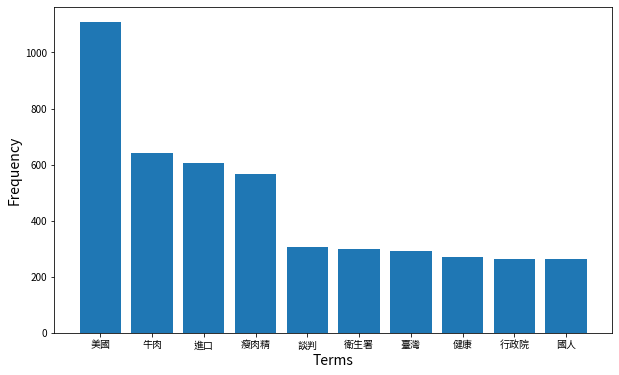

In [9]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,6))
plt.bar(cwdf['Terms'],
       cwdf['Freq.'])

plt.xlabel('Terms', fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
#plt.title("The 10 most frequent terms of anti-imports legislators in Ma era", fontsize = 18)

plt.show()